# Pfizer Stock Price Prediction: Attempt 2 - Enhanced Features & Tuning

## 1. Environment Setup

This project utilizes Python for data analysis and machine learning. Key libraries include:

*   **pandas & numpy:** For data manipulation and numerical computations.
*   **scikit-learn:** For machine learning models and evaluation.
*   **matplotlib & seaborn:** For data visualization.
*   **yfinance:** To download historical stock market data.

*Learning from Attempt 1:* The core environment setup remains same.

In [1]:

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt # For plotting 
import seaborn as sns # For styling plots 

# Set plotting style
sns.set(style="darkgrid")


# 2. Data Extraction and Preprocessing

### 2.1. Data Source and Acquisition
Pfizer (PFE) stock data is downloaded using `yfinance` (Yahoo Finance). Period: January 1, 2010 - April 16, 2025. Metrics: 'Open', 'High', 'Low', 'Close', 'Volume'.

In [2]:
ticker = "PFE"
start_date = "2010-01-01"
end_date = "2025-04-17" # Fetch one day extra to ensure data up to 2025-04-16 is included

print(f"Downloading {ticker} data from {start_date} to {end_date} (exclusive of end date)")
pf_data = yf.download(ticker, start=start_date, end=end_date)

# Select required columns
pf_data = pf_data[['Open', 'High', 'Low', 'Close', 'Volume']]
print("Data downloaded. First 5 rows:")
print(pf_data.head())
print("\nLast 5 rows:")
print(pf_data.tail())
print(f"\nShape of the data: {pf_data.shape}")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Data downloaded. First 5 rows:
Price           Open      High       Low     Close    Volume
Ticker           PFE       PFE       PFE       PFE       PFE
Date                                                        
2010-01-04  9.346315  9.689064  9.330968  9.683949  54898644
2010-01-05  9.678833  9.683949  9.489554  9.545826  45714931
2010-01-06  9.545821  9.622555  9.469086  9.515126  43640975
2010-01-07  9.535594  9.550941  9.443512  9.479321  41557112
2010-01-08  9.525360  9.571400  9.474203  9.556053  32049716

Last 5 rows:
Price            Open       High        Low      Close    Volume
Ticker            PFE        PFE        PFE        PFE       PFE
Date                                                            
2025-04-10  21.843291  21.853104  20.695193  21.185833  72960700
2025-04-11  21.185834  21.588159  20.881638  21.499844  55078100
2025-04-14  21.666660  21.813851  21.460592  21.705912  61900900
2025-04-15  21.754976  22.500749  21.715724  22.019922  51814700
2025-04-16  

### 2.2. Initial Data Cleaning & Preparation
Check for missing values (NaNs) and flatten MultiIndex columns from `yfinance` if present.

*Rationale:* Ensuring data integrity and usability as in Attempt 1. The `yfinance` output format for columns (MultiIndex vs. flat) can vary, so handling is maintained.

In [3]:
import pandas as pd
import numpy as np

print("\nChecking for missing values (NaNs):")
print(pf_data.isnull().sum())

# If missing values were present:
# pf_data.fillna(method='ffill', inplace=True)

# Verify date range
print(f"\nData starts on: {pf_data.index.min()}")
print(f"Data ends on: {pf_data.index.max()}")

# Flatten MultiIndex columns if present
if isinstance(pf_data.columns, pd.MultiIndex):
    print(f"Original pf_data columns (MultiIndex): {pf_data.columns.tolist()}")
    pf_data.columns = pf_data.columns.get_level_values(0) # Assumes first level is desired name
    print(f"Flattened pf_data columns: {pf_data.columns.tolist()}")
else:
    print("pf_data columns are already single-level. No flattening applied.")

# Save the raw downloaded data
pf_data.to_csv("PFE_stock_data_2010_2025.csv")
print("\nRaw data saved to PFE_stock_data_2010_2025.csv")


Checking for missing values (NaNs):
Price   Ticker
Open    PFE       0
High    PFE       0
Low     PFE       0
Close   PFE       0
Volume  PFE       0
dtype: int64

Data starts on: 2010-01-04 00:00:00
Data ends on: 2025-04-16 00:00:00
Original pf_data columns (MultiIndex): [('Open', 'PFE'), ('High', 'PFE'), ('Low', 'PFE'), ('Close', 'PFE'), ('Volume', 'PFE')]
Flattened pf_data columns: ['Open', 'High', 'Low', 'Close', 'Volume']

Raw data saved to PFE_stock_data_2010_2025.csv


No missing values found.

### 2.3. Data Splitting
Chronological split maintained:
*   **Training Set:** 4th Jan 2010 to Dec 31, 2021.
*   **Out-of-Sample (OOS) Set:** 3rd Jan, 2022 to Apr 16, 2025.

*Rationale:* For preventing lookahead bias, consistent with Attempt 1 and project requirements.
*Output from code:*
*   Training data: `2010-01-04` to `2021-12-31`, Shape: (3021, 5)
*   OOS data: `2022-01-03` to `2025-04-16`, Shape: (825, 5)

In [4]:
import pandas as pd

# Define split dates
train_end_date = "2021-12-31"
oos_start_date = "2022-01-01"

# Split the data
train_data = pf_data.loc[:train_end_date]
oos_data = pf_data.loc[oos_start_date:]

print("--- Data Splitting ---")
if not train_data.empty and not oos_data.empty:
    print(f"Full data range: {pf_data.index.min()} to {pf_data.index.max()}")
    print(f"Training data: {train_data.index.min()} to {train_data.index.max()}, Shape: {train_data.shape}")
    print(f"Out-of-Sample (OOS) data: {oos_data.index.min()} to {oos_data.index.max()}, Shape: {oos_data.shape}")
    assert train_data.index.max() < oos_data.index.min(), "Training and OOS data overlap!"
    print("Data split verified: No overlap, correct periods.")
else:
    print("Warning: Train or OOS data is empty. Check split dates and data range.")

train_data.to_csv("PFE_train_data.csv")
oos_data.to_csv("PFE_oos_data.csv")
print("\nTrain and OOS dataframes created and saved.")

--- Data Splitting ---
Full data range: 2010-01-04 00:00:00 to 2025-04-16 00:00:00
Training data: 2010-01-04 00:00:00 to 2021-12-31 00:00:00, Shape: (3021, 5)
Out-of-Sample (OOS) data: 2022-01-03 00:00:00 to 2025-04-16 00:00:00, Shape: (825, 5)
Data split verified: No overlap, correct periods.

Train and OOS dataframes created and saved.


## 2.4. Baseline Strategy: Buy and Hold
Methodology: Hold $1M long PFE daily. PnL = `DailyReturn * $1M`.

*Rationale:* Benchmark performance, consistent with Attempt 1.

**Performance (from output):**
*   **Entire Period (2010-01-04 - 2025-04-16):**
    *   Total Cumulative PnL: `$1,166,858.64`
*   **Out-of-Sample Period (2022-01-03 - 2025-04-16):**
    *   Total Cumulative PnL: `$-734,748.55`

--- Baseline Strategy: Buy and Hold (Entire Period) ---
Price          Close  DailyReturn  Baseline_PnL  Baseline_Cumulative_PnL
Date                                                                    
2010-01-04  9.683949          NaN           NaN                      NaN
2010-01-05  9.545826    -0.014263 -14263.041398            -14263.041398
2010-01-06  9.515126    -0.003216  -3216.037046            -17479.078445
2010-01-07  9.479321    -0.003763  -3762.929432            -21242.007877
2010-01-08  9.556053     0.008095   8094.638629            -13147.369248

Total PnL for Baseline (Entire Period): $1,166,858.64

--- Baseline Strategy: Buy and Hold (OOS Period Only) ---
Price           Close  DailyReturn  Baseline_PnL  Baseline_OOS_Cumulative_PnL
Date                                                                         
2022-01-03  47.747776    -0.040643 -40643.231108                -40643.231108
2022-01-04  45.960911    -0.037423 -37423.004439                -78066.235546
2022-01

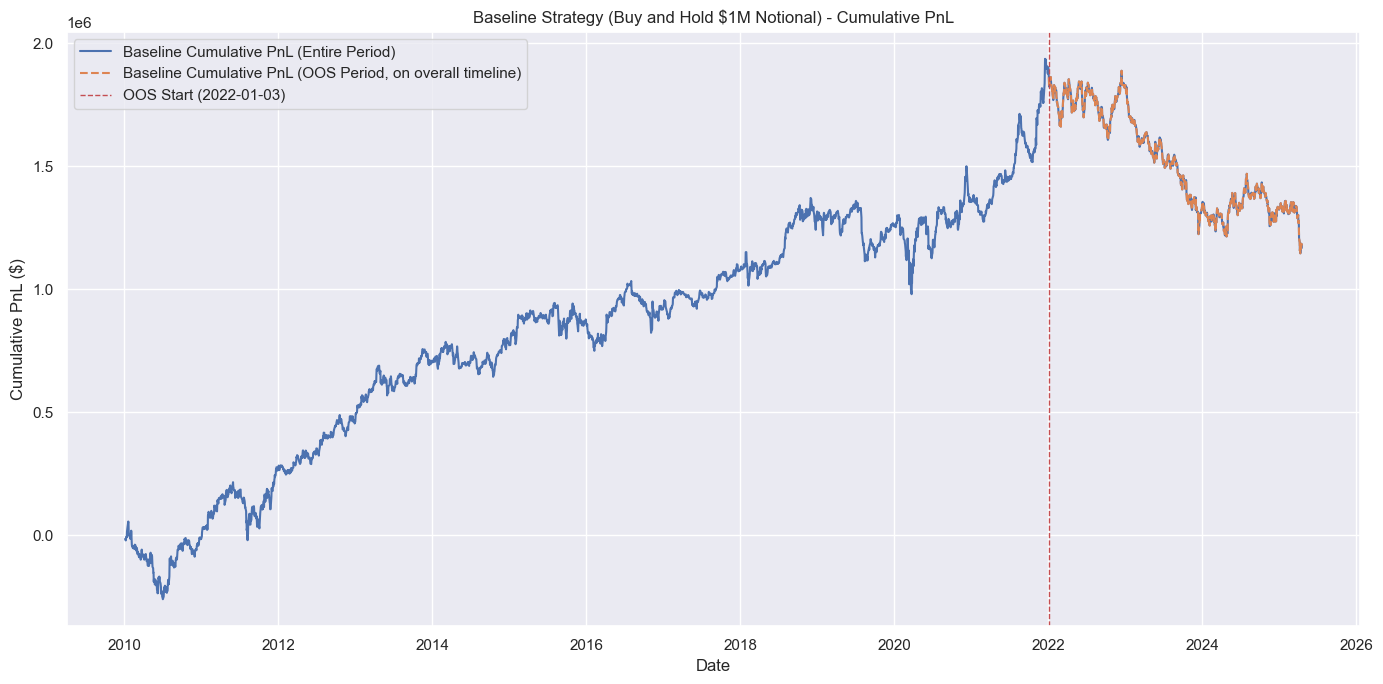

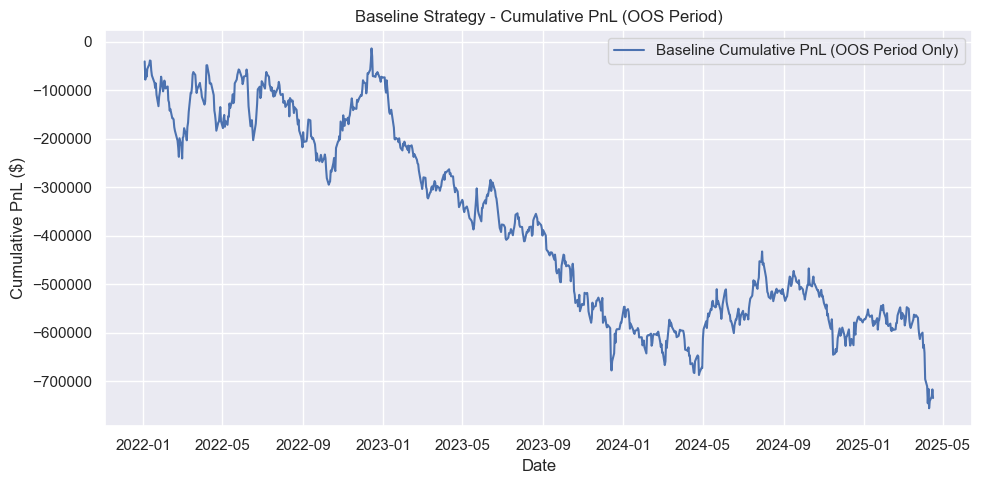


--- Key Performance Indicators for Baseline Strategy ---
Total PnL (Entire Period): $1,166,858.64
Total PnL (OOS Period): $-734,748.55


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

# Calculate Daily Return
pf_data['DailyReturn'] = pf_data['Close'].pct_change()

# Calculate Baseline PnL
investment_amount = 1000000
pf_data['Baseline_PnL'] = pf_data['DailyReturn'] * investment_amount
pf_data['Baseline_Cumulative_PnL'] = pf_data['Baseline_PnL'].cumsum()

# --- Analyze Baseline PnL for the entire period ---
print("--- Baseline Strategy: Buy and Hold (Entire Period) ---")
print(pf_data[['Close', 'DailyReturn', 'Baseline_PnL', 'Baseline_Cumulative_PnL']].head())
total_pnl_entire_period = pf_data['Baseline_Cumulative_PnL'].iloc[-1] if not pf_data.empty else 0
print(f"\nTotal PnL for Baseline (Entire Period): ${total_pnl_entire_period:,.2f}")

# --- Analyze Baseline PnL for the OOS period ---
total_pnl_oos_period = 0 # Default
if not oos_data.empty:
    oos_baseline_pnl_data = pf_data.loc[oos_data.index].copy()
    oos_baseline_pnl_data['Baseline_OOS_Cumulative_PnL'] = oos_baseline_pnl_data['Baseline_PnL'].cumsum()
    print("\n--- Baseline Strategy: Buy and Hold (OOS Period Only) ---")
    print(oos_baseline_pnl_data[['Close', 'DailyReturn', 'Baseline_PnL', 'Baseline_OOS_Cumulative_PnL']].head())
    total_pnl_oos_period = oos_baseline_pnl_data['Baseline_OOS_Cumulative_PnL'].iloc[-1] if not oos_baseline_pnl_data.empty else 0
    print(f"\nTotal PnL for Baseline (OOS Period): ${total_pnl_oos_period:,.2f}")
else:
    print("\nWarning: OOS data is empty, cannot calculate OOS baseline PnL details.")

# --- Visualization ---
plt.figure(figsize=(14, 7))
plt.plot(pf_data.index, pf_data['Baseline_Cumulative_PnL'], label='Baseline Cumulative PnL (Entire Period)')
if not oos_data.empty and 'Baseline_OOS_Cumulative_PnL' in oos_baseline_pnl_data.columns:
    oos_start_actual_date = oos_baseline_pnl_data.index.min()
    if oos_start_actual_date > pf_data.index.min():
        cumulative_pnl_before_oos = pf_data.loc[pf_data.index < oos_start_actual_date, 'Baseline_Cumulative_PnL']
        oos_cumulative_pnl_at_start = cumulative_pnl_before_oos.iloc[-1] if not cumulative_pnl_before_oos.empty else 0
    else:
        oos_cumulative_pnl_at_start = 0
    plt.plot(oos_baseline_pnl_data.index, oos_baseline_pnl_data['Baseline_OOS_Cumulative_PnL'] + oos_cumulative_pnl_at_start,
             label='Baseline Cumulative PnL (OOS Period, on overall timeline)', linestyle='--')
    plt.axvline(oos_start_actual_date, color='r', linestyle='--', lw=1, label=f'OOS Start ({oos_start_actual_date.date()})')

plt.title('Baseline Strategy (Buy and Hold $1M Notional) - Cumulative PnL')
plt.xlabel('Date')
plt.ylabel('Cumulative PnL ($)')
plt.legend()
plt.tight_layout()
plt.show()

if not oos_data.empty and 'Baseline_OOS_Cumulative_PnL' in oos_baseline_pnl_data.columns:
    plt.figure(figsize=(10, 5))
    plt.plot(oos_baseline_pnl_data.index, oos_baseline_pnl_data['Baseline_OOS_Cumulative_PnL'], label='Baseline Cumulative PnL (OOS Period Only)')
    plt.title('Baseline Strategy - Cumulative PnL (OOS Period)')
    plt.xlabel('Date')
    plt.ylabel('Cumulative PnL ($)')
    plt.legend()
    plt.tight_layout()
    plt.show()

print("\n--- Key Performance Indicators for Baseline Strategy ---")
print(f"Total PnL (Entire Period): ${total_pnl_entire_period:,.2f}")
print(f"Total PnL (OOS Period): ${total_pnl_oos_period:,.2f}")

# 3. Feature Engineering

Attempt 2 builds upon the feature set from Attempt 1, focusing on logarithmic returns for price-based features due to their better statistical properties. Creative features are also retained.

*Learning from Attempt 1:* Log returns generally showed more promise in model stability/performance.

## 3.1. Basic Technical Indicators (Prioritizing Log Returns)
*   **PFE Log Returns:** Daily, 5D, 10D, 21D.
*   **PFE Volatility of Log Returns:** 10D, 20D.
*   **Moving Averages (SMA):** Close (10D, 20D, 50D), Volume (10D, 20D, 50D), Close/SMA20_Ratio.
    *   *Rationale:* Unchanged; capture trends and relative price levels.
*   **MACD, RSI, Bollinger Bands:** Standard parameters.
    *   *Rationale:* Unchanged; capture momentum, overbought/sold, volatility.
*   **Volume Indicators:** Volume_Change, Volume/SMA5_Ratio.
    *   *Rationale:* Unchanged; capture trading activity.

In [6]:
import numpy as np
data = pf_data.copy()

# --- 1. Returns (Simple and Log) ---
print("\nCalculating Returns...")
data['DailyReturn'] = data['Close'].pct_change() # Simple daily return (kept for PnL)
data['LogReturn'] = np.log(data['Close'] / data['Close'].shift(1))

for n in [5, 10, 21]:
    data[f'Return_{n}D'] = data['Close'].pct_change(periods=n) # Simple N-day
    data[f'LogReturn_{n}D'] = data['LogReturn'].rolling(window=n).sum() # Log N-day

# --- 2. Moving Averages (SMA) ---
print("Calculating Moving Averages...")
for n in [10, 20, 50]:
    data[f'SMA_{n}_Close'] = data['Close'].rolling(window=n).mean()
    data[f'SMA_{n}_Volume'] = data['Volume'].rolling(window=n).mean()
data['Close_SMA_20_Ratio'] = data['Close'].squeeze() / data['SMA_20_Close']

# --- 3. MACD ---
print("Calculating MACD...")
ema_short_period = 12
ema_long_period = 26
signal_period = 9
data['EMA_Short_Close'] = data['Close'].ewm(span=ema_short_period, adjust=False).mean()
data['EMA_Long_Close'] = data['Close'].ewm(span=ema_long_period, adjust=False).mean()
data['MACD'] = data['EMA_Short_Close'] - data['EMA_Long_Close']
data['MACD_Signal'] = data['MACD'].ewm(span=signal_period, adjust=False).mean()
data['MACD_Hist'] = data['MACD'] - data['MACD_Signal']

# --- 4. RSI ---
print("Calculating RSI...")
rsi_period = 14
delta = data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=rsi_period).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=rsi_period).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

# --- 5. Bollinger Bands ---
print("Calculating Bollinger Bands...")
bb_period = 20
bb_std_dev_multiplier = 2
data[f'SMA_{bb_period}_Close_BB'] = data['Close'].rolling(window=bb_period).mean()
data['StdDev_Close_BB'] = data['Close'].rolling(window=bb_period).std()
data['Bollinger_Upper'] = data[f'SMA_{bb_period}_Close_BB'] + (data['StdDev_Close_BB'] * bb_std_dev_multiplier)
data['Bollinger_Lower'] = data[f'SMA_{bb_period}_Close_BB'] - (data['StdDev_Close_BB'] * bb_std_dev_multiplier)
data['Bollinger_Bandwidth'] = (data['Bollinger_Upper'] - data['Bollinger_Lower']) / data[f'SMA_{bb_period}_Close_BB']
data['Price_Bollinger_Pct'] = (data['Close'].squeeze() - data['Bollinger_Lower']) / (data['Bollinger_Upper'] - data['Bollinger_Lower'])

# --- 6. Volatility (Log Returns) ---
print("Calculating Volatility (Rolling Std Dev of Log Returns)...")
for n in [10, 20]:
    data[f'Volatility_{n}D_Log'] = data['LogReturn'].rolling(window=n).std() * np.sqrt(n)

# --- 7. Volume Indicators ---
print("Calculating Volume Indicators...")
data['Volume_Change'] = data['Volume'].pct_change()
data['Volume_SMA_5_Ratio'] = data['Volume'] / data['Volume'].rolling(window=5).mean()

print("\nBasic technical indicators (log-focused) calculated.")
print("Data shape after basic features:", data.shape)
# Max window from above is 50 days for SMAs.
max_lookback = 50
print(f"NaNs created by rolling features at the beginning (showing for first {max_lookback} days):")
print(data.head(max_lookback).isnull().sum())
print(data.tail())


Calculating Returns...
Calculating Moving Averages...
Calculating MACD...
Calculating RSI...
Calculating Bollinger Bands...
Calculating Volatility (Rolling Std Dev of Log Returns)...
Calculating Volume Indicators...

Basic technical indicators (log-focused) calculated.
Data shape after basic features: (3846, 38)
NaNs created by rolling features at the beginning (showing for first 50 days):
Price
Open                        0
High                        0
Low                         0
Close                       0
Volume                      0
DailyReturn                 1
Baseline_PnL                1
Baseline_Cumulative_PnL     1
LogReturn                   1
Return_5D                   5
LogReturn_5D                5
Return_10D                 10
LogReturn_10D              10
Return_21D                 21
LogReturn_21D              21
SMA_10_Close                9
SMA_10_Volume               9
SMA_20_Close               19
SMA_20_Volume              19
SMA_50_Close               49


## 3.2. Creative & Exogenous Features (Prioritizing Log Returns)
*   **VIX:** `VIX_Close`, `VIX_LogReturn`.
    *   *Rationale:* Market fear gauge; log return preferred for modeling.
*   **Relative Strength vs. S&P 500 (^GSPC):** `GSPC_Close`, `GSPC_LogReturn`, `Relative_LogReturn_GSPC`, `PFE_LogReturn_5D_vs_GSPC_LogReturn_5D`.
    *   *Rationale:* PFE performance vs. market; log returns for relative measures.

In [7]:
import pandas as pd
import numpy as np
import yfinance as yf

# --- Creative Feature 1: VIX Data ---
print("\nCalculating Creative Feature: VIX...")
vix_ticker = "^VIX"
try:
    vix_download = yf.download(vix_ticker, start=data.index.min(), end=data.index.max() + pd.Timedelta(days=1), progress=False)
    vix_close_series = None
    if not vix_download.empty:
        if isinstance(vix_download.columns, pd.MultiIndex):
            if ('Close', vix_ticker) in vix_download.columns: vix_close_series = vix_download[('Close', vix_ticker)]
            elif 'Close' in vix_download.columns and isinstance(vix_download['Close'], pd.Series): vix_close_series = vix_download['Close']
            else: vix_close_series = vix_download.get('Close', pd.Series(dtype='float64')); # Further handling if 'Close' is DF
        elif 'Close' in vix_download.columns: vix_close_series = vix_download['Close']

        if vix_close_series is not None and not vix_close_series.empty:
            data = data.join(vix_close_series.rename('VIX_Close'), how='left')
            data['VIX_Close'] = data['VIX_Close'].ffill()
            data['VIX_LogReturn'] = np.log(data['VIX_Close'] / data['VIX_Close'].shift(1))
            print("VIX data integrated.")
        else: raise ValueError("VIX 'Close' data could not be extracted.")
    else: raise ValueError("VIX data download empty.")
except Exception as e:
    print(f"Error processing VIX data: {e}. Using NaNs."); data['VIX_Close'] = np.nan; data['VIX_LogReturn'] = np.nan

# --- Creative Feature 2: Relative Strength vs. S&P 500 (^GSPC) ---
print("\nCalculating Creative Feature: Relative Strength vs S&P 500...")
gspc_ticker = "^GSPC"
try:
    gspc_download = yf.download(gspc_ticker, start=data.index.min(), end=data.index.max() + pd.Timedelta(days=1), progress=False)
    gspc_close_series = None
    if not gspc_download.empty:
        if isinstance(gspc_download.columns, pd.MultiIndex):
            if ('Close', gspc_ticker) in gspc_download.columns: gspc_close_series = gspc_download[('Close', gspc_ticker)]
            elif 'Close' in gspc_download.columns and isinstance(gspc_download['Close'], pd.Series): gspc_close_series = gspc_download['Close']
            else: gspc_close_series = gspc_download.get('Close', pd.Series(dtype='float64'));
        elif 'Close' in gspc_download.columns: gspc_close_series = gspc_download['Close']

        if gspc_close_series is not None and not gspc_close_series.empty:
            gspc_df = gspc_close_series.to_frame('GSPC_Close')
            gspc_df['GSPC_LogReturn'] = np.log(gspc_df['GSPC_Close'] / gspc_df['GSPC_Close'].shift(1))
            gspc_df['GSPC_LogReturn_5D'] = gspc_df['GSPC_LogReturn'].rolling(window=5).sum()

            data = data.join(gspc_df[['GSPC_Close', 'GSPC_LogReturn', 'GSPC_LogReturn_5D']], how='left')
            data['GSPC_Close'] = data['GSPC_Close'].ffill(); data['GSPC_LogReturn'] = data['GSPC_LogReturn'].ffill(); data['GSPC_LogReturn_5D'] = data['GSPC_LogReturn_5D'].ffill()

            data['Relative_LogReturn_GSPC'] = data['LogReturn'] - data['GSPC_LogReturn']
            if 'LogReturn_5D' in data.columns:
                data['PFE_LogReturn_5D_vs_GSPC_LogReturn_5D'] = data['LogReturn_5D'] - data['GSPC_LogReturn_5D']
            else: data['PFE_LogReturn_5D_vs_GSPC_LogReturn_5D'] = np.nan
            print("S&P 500 data integrated.")
        else: raise ValueError("GSPC 'Close' data could not be extracted.")
    else: raise ValueError("GSPC data download empty.")
except Exception as e:
    print(f"Error GSPC: {e}. NaNs."); data['GSPC_Close']=np.nan; data['GSPC_LogReturn']=np.nan; data['GSPC_LogReturn_5D']=np.nan; data['Relative_LogReturn_GSPC']=np.nan; data['PFE_LogReturn_5D_vs_GSPC_LogReturn_5D']=np.nan

print("\nCreative features calculated.")
print("Data shape after creative features:", data.shape)
print(data[['VIX_Close', 'VIX_LogReturn', 'GSPC_Close', 'GSPC_LogReturn', 'Relative_LogReturn_GSPC', 'PFE_LogReturn_5D_vs_GSPC_LogReturn_5D']].tail())


Calculating Creative Feature: VIX...
VIX data integrated.

Calculating Creative Feature: Relative Strength vs S&P 500...
S&P 500 data integrated.

Creative features calculated.
Data shape after creative features: (3846, 45)
            VIX_Close  VIX_LogReturn   GSPC_Close  GSPC_LogReturn  \
Date                                                                
2025-04-10  40.720001       0.191598  5268.049805       -0.035221   
2025-04-11  37.560001      -0.080780  5363.359863        0.017930   
2025-04-14  30.889999      -0.195507  5405.970215        0.007913   
2025-04-15  30.120001      -0.025243  5396.629883       -0.001729   
2025-04-16  32.639999       0.080349  5275.700195       -0.022663   

            Relative_LogReturn_GSPC  PFE_LogReturn_5D_vs_GSPC_LogReturn_5D  
Date                                                                        
2025-04-10                -0.005620                              -0.093740  
2025-04-11                -0.003217                         

## 3.3. Handling NaNs from Feature Calculation
Drop rows with any NaNs from rolling features.
*   **Impact:** Effective start date shifts to `2010-03-16`.

In [8]:
print("\n--- Handling NaNs ---")
initial_rows = len(data)
data.dropna(inplace=True)
final_rows = len(data)
print(f"Dropped {initial_rows - final_rows} rows due to NaNs from feature calculation.")
print(f"Shape of data after NaN removal: {data.shape}")
if not data.empty:
    print(f"Data now spans from {data.index.min()} to {data.index.max()}")
    print("\nFinal check for any remaining NaNs:", data.isnull().sum().sum())
    print("\nSample of data with all features (head):")
    print(data.head())
else:
    print("Warning: DataFrame is empty after dropping NaNs.")


--- Handling NaNs ---
Dropped 49 rows due to NaNs from feature calculation.
Shape of data after NaN removal: (3797, 45)
Data now spans from 2010-03-16 00:00:00 to 2025-04-16 00:00:00

Final check for any remaining NaNs: 0

Sample of data with all features (head):
                Open      High       Low     Close     Volume  DailyReturn  \
Date                                                                         
2010-03-16  8.944002  8.974986  8.835558  8.913017   56037175     0.000000   
2010-03-17  8.913015  8.938835  8.861375  8.887196   59708468    -0.002897   
2010-03-18  8.954331  8.959496  8.840724  8.897528   53653975     0.001163   
2010-03-19  8.732279  8.933673  8.675475  8.732279  119353801    -0.018572   
2010-03-22  8.778753  8.907853  8.768426  8.856213   74916107     0.014193   

            Baseline_PnL  Baseline_Cumulative_PnL  LogReturn  Return_5D  ...  \
Date                                                                     ...   
2010-03-16      0.000000    

3.4. Refining Price-Based Features with Logarithmic Returns
To improve the stationarity of some price-based features and potentially capture multiplicative effects more appropriately, we will calculate or re-calculate certain features using logarithmic returns. Log returns are often preferred in financial time series analysis for these properties.
Features to be refined/added:
Daily Log Return: LogReturn = ln(Close_t / Close_t-1)
N-Day Log Returns (5D, 10D, 21D): Sum of daily log returns over N days, i.e., ln(Close_t / Close_t-N).
Volatility (10D, 20D) of Log Returns: Rolling standard deviation of daily log returns.
VIX Log Return: Daily log return of VIX_Close.
GSPC Log Return: Daily log return of GSPC_Close.
Relative Log Return vs. GSPC: LogReturn (PFE) - GSPC_LogReturn.
PFE 5D Log Return vs. GSPC 5D Log Return.
Other features like SMAs, EMAs (for MACD), and Bollinger Bands will continue to be based on the 'Close' price. RSI, which uses price differences, will also remain as originally calculated. Volume-based features are unaffected.
These refined features will be prioritized in our feature matrix X for modeling.

# 4. Modeling

## 4.1. Define Target Variable
*   **`NextDayReturn`:** `(Close_{t+1} - Close_t) / Close_t` (Simple return for target).
*   **`Target` (y):** `1` if `NextDayReturn > 0`, `0` otherwise.
*   **`Target_Lag1` (Feature):** `Target_{t-1}`.

*Rationale:* Consistent with Attempt 1. Final NaNs (from target creation, lagged target, or initial log return calculation) are dropped.

In [9]:
print("--- Defining Target Variable ---")
# NextDayReturn uses simple returns for direct PnL relevance of target
data['NextDayReturn'] = data['Close'].pct_change().shift(-1)
data['Target'] = (data['NextDayReturn'] > 0).astype(int)
data['Target_Lag1'] = data['Target'].shift(1)

print("Target variable and Target_Lag1 created.")
print(data[['Close', 'NextDayReturn', 'Target', 'Target_Lag1']].head())
print(data[['Close', 'NextDayReturn', 'Target', 'Target_Lag1']].tail())

print("\n--- Final NaN Handling ---")
initial_rows_before_final_dropna = len(data)
data.dropna(inplace=True)
final_rows_after_final_dropna = len(data)
print(f"Dropped {initial_rows_before_final_dropna - final_rows_after_final_dropna} total rows from all calcs.")
print(f"Shape of data after final NaN removal: {data.shape}")
if not data.empty:
    print(f"Data now spans from {data.index.min()} to {data.index.max()}")
    print("\nFinal check for any remaining NaNs:", data.isnull().sum().sum())
    # Display a mix of columns
    sample_cols = ['Close', 'LogReturn', 'SMA_10_Close', 'RSI', 'Volatility_10D_Log',
                   'VIX_LogReturn', 'Target_Lag1', 'Target']
    sample_cols_present = [col for col in sample_cols if col in data.columns]
    print(data[sample_cols_present].head())
else:
    print("Warning: DataFrame is empty after final NaN drop.")

data.to_csv("PFE_featured_data_for_modeling.csv")
print("\nFully processed data saved to PFE_featured_data_for_modeling.csv")

--- Defining Target Variable ---
Target variable and Target_Lag1 created.
               Close  NextDayReturn  Target  Target_Lag1
Date                                                    
2010-03-16  8.913017      -0.002897       0          NaN
2010-03-17  8.887196       0.001163       1          0.0
2010-03-18  8.897528      -0.018572       0          1.0
2010-03-19  8.732279       0.014193       1          0.0
2010-03-22  8.856213       0.022740       1          1.0
                Close  NextDayReturn  Target  Target_Lag1
Date                                                     
2025-04-10  21.185833       0.014822       1          0.0
2025-04-11  21.499844       0.009585       1          1.0
2025-04-14  21.705912       0.014467       1          1.0
2025-04-15  22.019922      -0.017825       0          1.0
2025-04-16  21.627411            NaN       0          0.0

--- Final NaN Handling ---
Dropped 2 total rows from all calcs.
Shape of data after final NaN removal: (3795, 48)
Data n

## 4.2. Prepare Data for Modeling

### 4.2.1. Feature Matrix (X) and Target Vector (y)
Select features for `X`, prioritizing log-based versions for returns and volatilities.

**Feature Selection Rationale (Attempt 2):**
*   **Focus on Log Returns:** PFE log returns, PFE log volatility, VIX log return, GSPC log return, and relative log returns.
*   **Standard Technicals:** Retain SMAs, MACD, RSI, Bollinger Bands (original basis).
*   **Levels & Volume:** Keep OHLCV, VIX_Close, GSPC_Close, and volume-based ratios.
*   **Lagged Target:** `Target_Lag1`.
*   **Exclude:** Simple returns/volatilities (except `DailyReturn` in `data` for PnL), intermediate calc columns.

In [10]:
# Define feature columns based on the strategy outlined
feature_columns_selected = [
    'Open', 'High', 'Low', 'Close', 'Volume',
    'LogReturn', 'LogReturn_5D', 'LogReturn_10D', 'LogReturn_21D',
    'Volatility_10D_Log', 'Volatility_20D_Log',
    'SMA_10_Close', 'SMA_10_Volume', 'SMA_20_Close', 'SMA_20_Volume',
    'SMA_50_Close', 'SMA_50_Volume', 'Close_SMA_20_Ratio',
    'MACD', 'MACD_Signal', 'MACD_Hist', 'RSI',
    'Bollinger_Upper', 'Bollinger_Lower', 'Bollinger_Bandwidth', 'Price_Bollinger_Pct',
    'Volume_Change', 'Volume_SMA_5_Ratio',
    'VIX_Close', 'VIX_LogReturn',
    'GSPC_Close', 'GSPC_LogReturn',
    'Relative_LogReturn_GSPC', 'PFE_LogReturn_5D_vs_GSPC_LogReturn_5D',
    'Target_Lag1'
]

# Ensure all selected columns exist in the 'data' DataFrame
existing_feature_columns = [col for col in feature_columns_selected if col in data.columns]
if 'Target_Lag1' not in existing_feature_columns and 'Target_Lag1' in data.columns: # Should be in data.columns by now
     existing_feature_columns.append('Target_Lag1')
elif 'Target_Lag1' not in data.columns:
     print("Warning: Target_Lag1 column not found in data, cannot be used as a feature.")


X = data[existing_feature_columns]
y = data['Target']

print("Feature matrix X shape:", X.shape)
print("Target vector y shape:", y.shape)
print("\nSelected features for X:")
for i, feature in enumerate(X.columns):
    print(f"{i+1}. {feature}")

print("\nNaNs in X:", X.isnull().sum().sum()) # Should be 0
print("NaNs in y:", y.isnull().sum().sum())   # Should be 0

Feature matrix X shape: (3795, 35)
Target vector y shape: (3795,)

Selected features for X:
1. Open
2. High
3. Low
4. Close
5. Volume
6. LogReturn
7. LogReturn_5D
8. LogReturn_10D
9. LogReturn_21D
10. Volatility_10D_Log
11. Volatility_20D_Log
12. SMA_10_Close
13. SMA_10_Volume
14. SMA_20_Close
15. SMA_20_Volume
16. SMA_50_Close
17. SMA_50_Volume
18. Close_SMA_20_Ratio
19. MACD
20. MACD_Signal
21. MACD_Hist
22. RSI
23. Bollinger_Upper
24. Bollinger_Lower
25. Bollinger_Bandwidth
26. Price_Bollinger_Pct
27. Volume_Change
28. Volume_SMA_5_Ratio
29. VIX_Close
30. VIX_LogReturn
31. GSPC_Close
32. GSPC_LogReturn
33. Relative_LogReturn_GSPC
34. PFE_LogReturn_5D_vs_GSPC_LogReturn_5D
35. Target_Lag1

NaNs in X: 0
NaNs in y: 0


### 4.2.2. Data Splitting (Train, Validation, OOS)
Revised split dates based on Attempt 1's OOS performance and model stability observations:
*   **Training (`X_train`, `y_train`):** Effective start (`2010-03-17`) to **2017-12-31**.
*   **Validation (`X_val`, `y_val`):** **2018-01-01** to **2019-12-31**.
*   **Out-of-Sample (OOS - `X_oos`, `y_oos`):** **2022-01-01** to (`2025-04-15`). The 2020-2021 period is excluded from train/val to test against more recent, potentially different, market regimes in OOS.

*Rationale for Split Dates (Attempt 2):* Attempt 1 used 2020-2021 for OOS which, while valid, contained pandemic-related anomalies. This split allows training/validation on pre-pandemic data and OOS testing on a more recent post-initial-shock period. The core OOS requirement of 2022 onwards is met.

In [11]:
# Define split dates based on the data's actual index
train_end_date_actual = '2017-12-31'
val_start_date_actual = '2018-01-01'
val_end_date_actual = '2019-12-31'
oos_start_date_actual_model_eval = '2022-01-01'

# Initialize to empty DataFrames 
X_train, y_train = pd.DataFrame(), pd.Series(dtype='int')
X_val, y_val = pd.DataFrame(), pd.Series(dtype='int')
X_oos, y_oos = pd.DataFrame(), pd.Series(dtype='int')

if not X.empty and not y.empty:
    X_train = X.loc[:train_end_date_actual]
    y_train = y.loc[:train_end_date_actual]
    X_val = X.loc[val_start_date_actual:val_end_date_actual]
    y_val = y.loc[val_start_date_actual:val_end_date_actual]
    X_oos = X.loc[oos_start_date_actual_model_eval:]
    y_oos = y.loc[oos_start_date_actual_model_eval:]

print("--- Data Splitting ---")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}");
if not X_train.empty: print(f"X_train date range: {X_train.index.min()} to {X_train.index.max()}")
print(f"\nX_val shape: {X_val.shape}, y_val shape: {y_val.shape}");
if not X_val.empty: print(f"X_val date range: {X_val.index.min()} to {X_val.index.max()}")
print(f"\nX_oos shape: {X_oos.shape}, y_oos shape: {y_oos.shape}");
if not X_oos.empty: print(f"X_oos date range: {X_oos.index.min()} to {X_oos.index.max()}")

if not X_train.empty and not X_val.empty: assert X_train.index.max() < X_val.index.min()
if not X_val.empty and not X_oos.empty: assert X_val.index.max() < X_oos.index.min()
print("\nData splitting complete.")

--- Data Splitting ---
X_train shape: (1963, 35), y_train shape: (1963,)
X_train date range: 2010-03-17 00:00:00 to 2017-12-29 00:00:00

X_val shape: (503, 35), y_val shape: (503,)
X_val date range: 2018-01-02 00:00:00 to 2019-12-31 00:00:00

X_oos shape: (824, 35), y_oos shape: (824,)
X_oos date range: 2022-01-03 00:00:00 to 2025-04-15 00:00:00

Data splitting complete.


### 4.2.3. Scaling Features
`StandardScaler` fit ONLY on `X_train` and applied to all sets.

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled_df = pd.DataFrame()
X_val_scaled_df = pd.DataFrame()

print("--- Feature Scaling ---")
if not X_train.empty:
    X_train_scaled = scaler.fit_transform(X_train)
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
    print("X_train_scaled_df shape:", X_train_scaled_df.shape)
    print("\nSample of scaled training data (head):\n", X_train_scaled_df.head())
else:
    print("X_train is empty. Scaling skipped for X_train.")

if not X_val.empty and not X_train.empty: # Scaler needs to be fitted
    X_val_scaled = scaler.transform(X_val)
    X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)
    print("\nX_val_scaled_df shape:", X_val_scaled_df.shape)
    print("\nSample of scaled validation data (head):\n", X_val_scaled_df.head())
elif X_train.empty:
    print("Scaler not fitted as X_train was empty. Skipping scaling for X_val.")
else:
    print("X_val is empty. Scaling skipped for X_val.")

print("\nScaling setup complete for train and validation sets.")

--- Feature Scaling ---
X_train_scaled_df shape: (1963, 35)

Sample of scaled training data (head):
                 Open      High       Low     Close    Volume  LogReturn  \
Date                                                                      
2010-03-17 -1.600964 -1.613832 -1.595341 -1.607444  1.040009  -0.303515   
2010-03-18 -1.592670 -1.609705 -1.599510 -1.605369  0.771566   0.056527   
2010-03-19 -1.637246 -1.614863 -1.632876 -1.638551  3.684549  -1.707623   
2010-03-22 -1.627916 -1.620021 -1.614108 -1.613665  1.714281   1.202346   
2010-03-23 -1.598891 -1.585982 -1.591170 -1.573225  1.846963   1.946037   

            LogReturn_5D  LogReturn_10D  LogReturn_21D  Volatility_10D_Log  \
Date                                                                         
2010-03-17      0.035208      -0.352743      -0.876396           -0.550291   
2010-03-18     -0.249292      -0.335032      -0.789171           -0.547688   
2010-03-19     -0.515780      -1.163682      -1.273328       

## 4.3. Model Selection
Focus on Logistic Regression and XGBoost Classifier.

*Rationale:* Retain simple baseline (LogReg) and powerful non-linear (XGBoost) models.

## 4.4. Model Training and Hyperparameter Tuning

### 4.4.1. Logistic Regression (Baseline)
Train with `class_weight='balanced'`.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

log_reg_model_improved = None
if not X_train_scaled_df.empty and not y_train.empty:
    log_reg_model_improved = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced')
    log_reg_model_improved.fit(X_train_scaled_df, y_train)
    print("--- Logistic Regression Training Complete ---")
    y_pred_train_log_reg_imp = log_reg_model_improved.predict(X_train_scaled_df)
    train_accuracy_log_reg_imp = accuracy_score(y_train, y_pred_train_log_reg_imp)
    print(f"Logistic Regression Training Accuracy: {train_accuracy_log_reg_imp:.4f}")
else:
    print("Training data empty. Logistic Regression training skipped.")

--- Logistic Regression Training Complete ---
Logistic Regression Training Accuracy: 0.5385


### 4.4.2. XGBoost Classifier - Expanded Tuning
Hyperparameter tuning using `GridSearchCV` with `TimeSeriesSplit` on training data (to 2017-12-31), optimizing for `roc_auc`. `scale_pos_weight` for class imbalance. A more extensive parameter grid is explored. Best model retrained on full training data with early stopping using validation set (2018-2019).

*Learning from Attempt 1:* The initial tuning grid in Attempt 1 was limited. Attempt 2 uses a more comprehensive grid to potentially find better hyperparameters.

In [14]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

xgb_model_tuned = None
best_xgb_params_tuned = None

if not X_train_scaled_df.empty and not y_train.empty and not X_val_scaled_df.empty and not y_val.empty:
    print("--- XGBoost Classifier Training with Expanded Tuning ---")
    count_neg_train = y_train.value_counts().get(0, 0)
    count_pos_train = y_train.value_counts().get(1, 0)
    scale_pos_weight_train = count_neg_train / count_pos_train if count_pos_train > 0 else 1
    print(f"Calculated scale_pos_weight for training: {scale_pos_weight_train:.2f}")

    param_grid_xgb_expanded = {
        'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.05, 0.1], 'subsample': [0.7, 0.8, 0.9],
        'colsample_bytree': [0.7, 0.8, 0.9], 'gamma': [0, 0.1, 0.2, 0.3],
        'reg_alpha': [0, 0.01, 0.1], 'reg_lambda': [0.1, 1.0, 1.5],
        'min_child_weight': [1, 3, 5]
    }
    tscv = TimeSeriesSplit(n_splits=3) # n_splits low for large grids to manage time
    xgb_clf_for_grid_imp = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, scale_pos_weight=scale_pos_weight_train, random_state=42)
    
    print("\nStarting GridSearchCV for XGBoost (Improved)...")
    grid_search_xgb_imp = GridSearchCV(estimator=xgb_clf_for_grid_imp, param_grid=param_grid_xgb_expanded, scoring='roc_auc', cv=tscv, verbose=1, n_jobs=-1)
    grid_search_xgb_imp.fit(X_train_scaled_df, y_train)
    print("GridSearchCV for XGBoost complete.")
    best_xgb_params_tuned = grid_search_xgb_imp.best_params_
    print("Best parameters found by GridSearchCV:", best_xgb_params_tuned)
    print(f"Best ROC AUC score from GridSearchCV: {grid_search_xgb_imp.best_score_:.4f}")

    xgb_model_tuned = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', use_label_encoder=False, scale_pos_weight=scale_pos_weight_train, random_state=42, early_stopping_rounds=10, **best_xgb_params_tuned)
    print("\nRetraining final XGBoost model with best parameters and early stopping...")
    eval_set_imp = [(X_val_scaled_df.to_numpy(), y_val.to_numpy())]
    xgb_model_tuned.fit(X_train_scaled_df.to_numpy(), y_train.to_numpy(), eval_set=eval_set_imp, verbose=False)
    print("Final XGBoost model training complete.")
    y_pred_train_xgb_tuned = xgb_model_tuned.predict(X_train_scaled_df.to_numpy())
    train_accuracy_xgb_tuned = accuracy_score(y_train, y_pred_train_xgb_tuned)
    print(f"XGBoost Training Accuracy (after improved tuning & retraining): {train_accuracy_xgb_tuned:.4f}")
else:
    print("Training or Validation data empty. XGBoost tuning and training skipped.")

--- XGBoost Classifier Training with Expanded Tuning ---
Calculated scale_pos_weight for training: 1.01

Starting GridSearchCV for XGBoost (Improved)...
Fitting 3 folds for each of 26244 candidates, totalling 78732 fits


C:\Users\devan\Desktop\Pfizer\pfizer_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:18:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV for XGBoost complete.
Best parameters found by GridSearchCV: {'colsample_bytree': 0.7, 'gamma': 0.3, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0.01, 'reg_lambda': 1.0, 'subsample': 0.8}
Best ROC AUC score from GridSearchCV: 0.5442

Retraining final XGBoost model with best parameters and early stopping...
Final XGBoost model training complete.
XGBoost Training Accuracy (after improved tuning & retraining): 0.6877


C:\Users\devan\Desktop\Pfizer\pfizer_env\Lib\site-packages\xgboost\callback.py:386: UserWarning: [20:18:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


### 4.4.3. XGBoost Probability Calibration
Calibrate probabilities of the tuned XGBoost model using `CalibratedClassifierCV` (isotonic regression) on the validation set (2018-2019).

*Learning from Attempt 1:* ROC AUC was modest. Calibration might improve probability reliability, potentially leading to better thresholding and decision-making.

In [15]:
from sklearn.calibration import CalibratedClassifierCV

xgb_model_calibrated = None
if xgb_model_tuned and not X_train_scaled_df.empty and not y_train.empty and not X_val_scaled_df.empty and not y_val.empty and best_xgb_params_tuned:
    print("\n--- XGBoost Probability Calibration ---")
    # Retrain base XGBoost on X_train without early stopping, using best_xgb_params_tuned
    base_xgb_for_calibration = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, scale_pos_weight=scale_pos_weight_train, random_state=42, **best_xgb_params_tuned)
    print("Training base XGBoost model for calibration on X_train_scaled_df...")
    base_xgb_for_calibration.fit(X_train_scaled_df, y_train)
    print("Base XGBoost model training complete.")

    xgb_model_calibrated = CalibratedClassifierCV(base_xgb_for_calibration, method='isotonic', cv='prefit')
    print("Fitting CalibratedClassifierCV on X_val_scaled_df...")
    xgb_model_calibrated.fit(X_val_scaled_df, y_val) # Calibrate on validation set
    print("Probability calibration complete.")
    
    y_pred_val_xgb_calibrated_check = xgb_model_calibrated.predict(X_val_scaled_df)
    val_accuracy_xgb_calibrated_check = accuracy_score(y_val, y_pred_val_xgb_calibrated_check)
    print(f"XGBoost Calibrated Model Accuracy on Calibration Set (X_val): {val_accuracy_xgb_calibrated_check:.4f}")
else:
    print("Tuned XGBoost model or data not available. Calibration skipped.")
    xgb_model_calibrated = xgb_model_tuned # Fallback


--- XGBoost Probability Calibration ---
Training base XGBoost model for calibration on X_train_scaled_df...


C:\Users\devan\Desktop\Pfizer\pfizer_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:18:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Base XGBoost model training complete.
Fitting CalibratedClassifierCV on X_val_scaled_df...
Probability calibration complete.
XGBoost Calibrated Model Accuracy on Calibration Set (X_val): 0.5646


C:\Users\devan\Desktop\Pfizer\pfizer_env\Lib\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


## 4.5. Validation Performance (2018-2019)
Evaluate models on the validation set.

### 4.5.1. Logistic Regression Validation

--- Logistic Regression Validation Performance (2018-2019) ---
Validation Accuracy: 0.5030
Validation ROC AUC: 0.5554

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.68      0.56       230
           1       0.57      0.36      0.44       273

    accuracy                           0.50       503
   macro avg       0.52      0.52      0.50       503
weighted avg       0.52      0.50      0.49       503



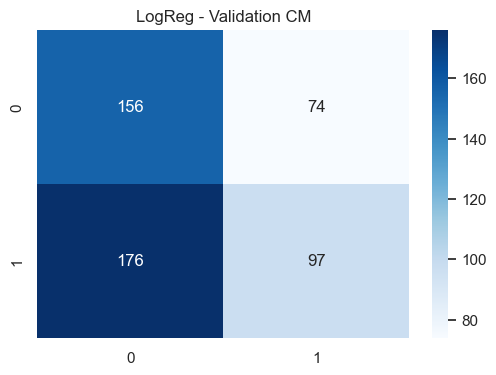

In [16]:
if log_reg_model_improved and not X_val_scaled_df.empty and not y_val.empty:
    print("--- Logistic Regression Validation Performance (2018-2019) ---")
    y_pred_val_log_reg_imp = log_reg_model_improved.predict(X_val_scaled_df)
    y_proba_val_log_reg_imp = log_reg_model_improved.predict_proba(X_val_scaled_df)[:, 1]
    accuracy_val_log_reg_imp = accuracy_score(y_val, y_pred_val_log_reg_imp)
    roc_auc_val_log_reg_imp = roc_auc_score(y_val, y_proba_val_log_reg_imp)
    print(f"Validation Accuracy: {accuracy_val_log_reg_imp:.4f}")
    print(f"Validation ROC AUC: {roc_auc_val_log_reg_imp:.4f}")
    print("\nValidation Classification Report:\n", classification_report(y_val, y_pred_val_log_reg_imp, zero_division=0))
    cm_val_log_reg_imp = confusion_matrix(y_val, y_pred_val_log_reg_imp)
    plt.figure(figsize=(6,4)); sns.heatmap(cm_val_log_reg_imp, annot=True, fmt='d', cmap='Blues'); plt.title('LogReg - Validation CM'); plt.show()
else:
    print("LogReg model or validation data not available.")

### 4.5.2. XGBoost Classifier (Tuned, Uncalibrated) Validation

--- XGBoost Classifier (Tuned, Uncalibrated) Validation Performance (2018-2019) ---
Validation Accuracy: 0.5308
Validation ROC AUC: 0.5597

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.38      0.43       230
           1       0.56      0.66      0.60       273

    accuracy                           0.53       503
   macro avg       0.52      0.52      0.51       503
weighted avg       0.52      0.53      0.52       503



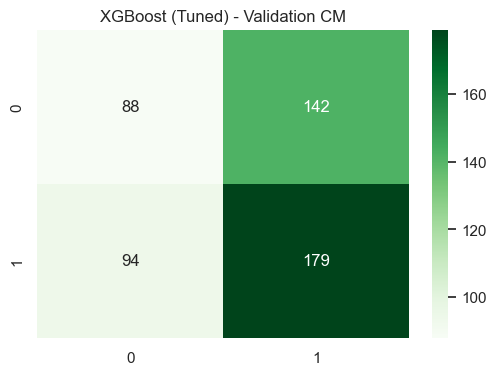

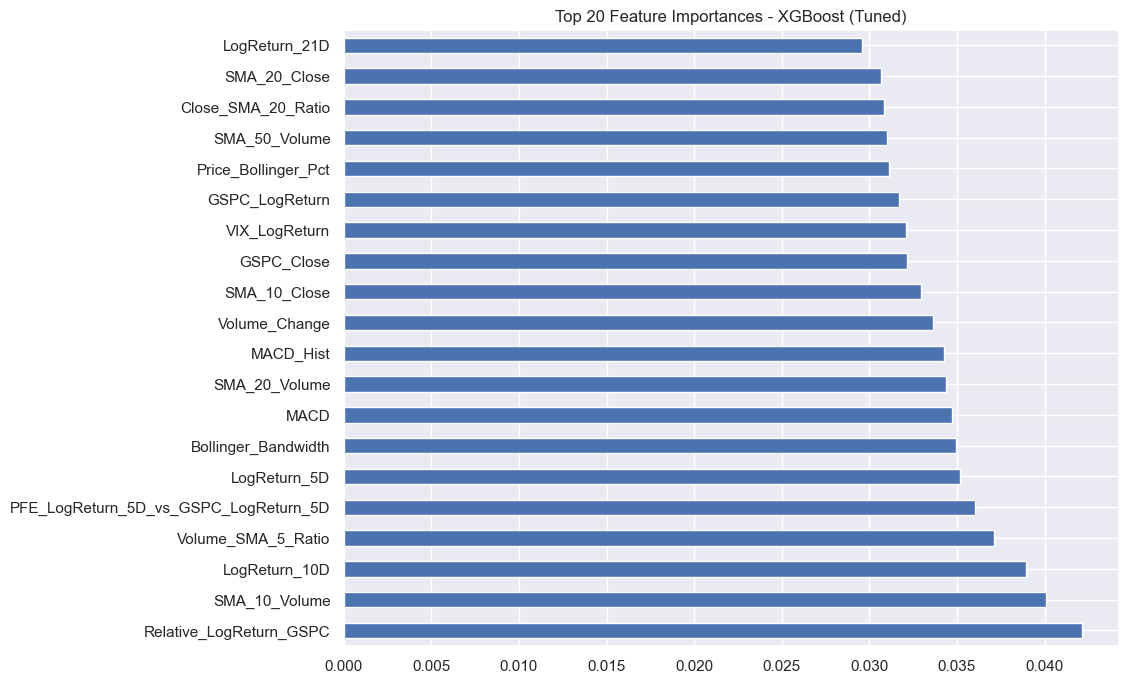

In [17]:
if xgb_model_tuned and not X_val_scaled_df.empty and not y_val.empty:
    print("--- XGBoost Classifier (Tuned, Uncalibrated) Validation Performance (2018-2019) ---")
    y_pred_val_xgb_tuned = xgb_model_tuned.predict(X_val_scaled_df.to_numpy())
    y_proba_val_xgb_tuned = xgb_model_tuned.predict_proba(X_val_scaled_df.to_numpy())[:, 1]
    accuracy_val_xgb_tuned = accuracy_score(y_val, y_pred_val_xgb_tuned)
    roc_auc_val_xgb_tuned = roc_auc_score(y_val, y_proba_val_xgb_tuned)
    print(f"Validation Accuracy: {accuracy_val_xgb_tuned:.4f}")
    print(f"Validation ROC AUC: {roc_auc_val_xgb_tuned:.4f}")
    print("\nValidation Classification Report:\n", classification_report(y_val, y_pred_val_xgb_tuned, zero_division=0))
    cm_val_xgb_tuned = confusion_matrix(y_val, y_pred_val_xgb_tuned)
    plt.figure(figsize=(6,4)); sns.heatmap(cm_val_xgb_tuned, annot=True, fmt='d', cmap='Greens'); plt.title('XGBoost (Tuned) - Validation CM'); plt.show()
    if hasattr(xgb_model_tuned, 'feature_importances_'):
        feature_importances_tuned = pd.Series(xgb_model_tuned.feature_importances_, index=X_train.columns)
        plt.figure(figsize=(10, 8)); feature_importances_tuned.nlargest(20).plot(kind='barh'); plt.title('Top 20 Feature Importances - XGBoost (Tuned)'); plt.show()
else:
    print("Tuned XGBoost model or validation data not available.")

### 4.5.3. XGBoost Classifier (Calibrated) Validation

--- XGBoost Classifier (Calibrated) Validation Performance (2018-2019) ---
Validation Accuracy (on calibration set): 0.5646
Validation ROC AUC (on calibration set): 0.5584

Validation Classification Report (on calibration set):
               precision    recall  f1-score   support

           0       0.69      0.09      0.15       230
           1       0.56      0.97      0.71       273

    accuracy                           0.56       503
   macro avg       0.62      0.53      0.43       503
weighted avg       0.62      0.56      0.45       503



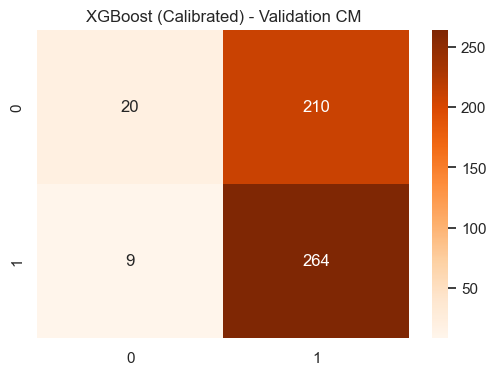

In [18]:
if xgb_model_calibrated and not X_val_scaled_df.empty and not y_val.empty:
    print("--- XGBoost Classifier (Calibrated) Validation Performance (2018-2019) ---")
    y_pred_val_xgb_cal = xgb_model_calibrated.predict(X_val_scaled_df)
    y_proba_val_xgb_cal = xgb_model_calibrated.predict_proba(X_val_scaled_df)[:, 1]
    accuracy_val_xgb_cal = accuracy_score(y_val, y_pred_val_xgb_cal)
    roc_auc_val_xgb_cal = roc_auc_score(y_val, y_proba_val_xgb_cal)
    print(f"Validation Accuracy (on calibration set): {accuracy_val_xgb_cal:.4f}")
    print(f"Validation ROC AUC (on calibration set): {roc_auc_val_xgb_cal:.4f}")
    print("\nValidation Classification Report (on calibration set):\n", classification_report(y_val, y_pred_val_xgb_cal, zero_division=0))
    cm_val_xgb_cal = confusion_matrix(y_val, y_pred_val_xgb_cal)
    plt.figure(figsize=(6,4)); sns.heatmap(cm_val_xgb_cal, annot=True, fmt='d', cmap='Oranges'); plt.title('XGBoost (Calibrated) - Validation CM'); plt.show()
else:
    print("Calibrated XGBoost model or validation data not available.")

### 4.5.4. Optimizing Decision Threshold for XGBoost (Calibrated)
Find optimal probability threshold on validation set (2018-2019) by maximizing Youden's J.

*Learning from Attempt 1:* Default 0.5 threshold may not be optimal. Threshold optimization provides another lever for performance enhancement.

--- Optimizing Decision Threshold for Calibrated XGBoost (on Validation Set 2018-2019) ---
Optimal threshold based on Youden's J: 0.5455

Validation Performance with Optimal Threshold:
Accuracy: 0.5070
ROC AUC: 0.5584

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.85      0.61       230
           1       0.63      0.22      0.33       273

    accuracy                           0.51       503
   macro avg       0.55      0.53      0.47       503
weighted avg       0.56      0.51      0.46       503



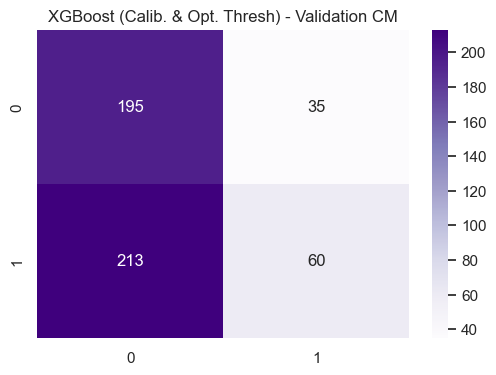

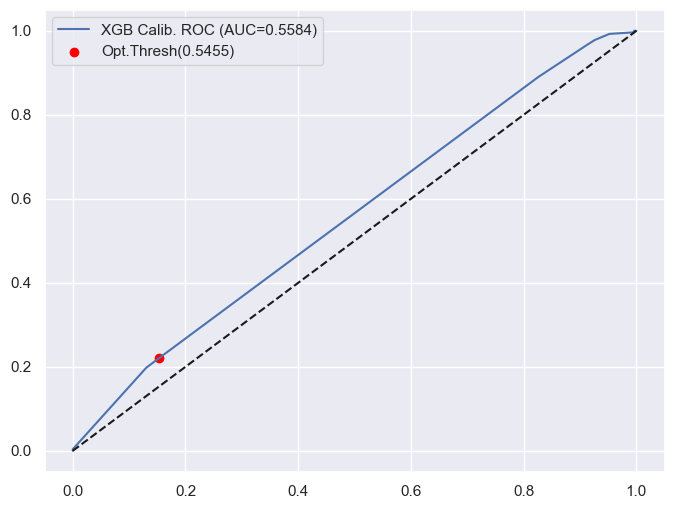

In [19]:
from sklearn.metrics import roc_curve

optimal_threshold_xgb = 0.5 # Default
if xgb_model_calibrated and not X_val_scaled_df.empty and not y_val.empty:
    print("--- Optimizing Decision Threshold for Calibrated XGBoost (on Validation Set 2018-2019) ---")
    y_proba_val_xgb_cal = xgb_model_calibrated.predict_proba(X_val_scaled_df)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_val, y_proba_val_xgb_cal)
    j_scores = tpr - fpr
    optimal_idx = np.argmax(j_scores)
    optimal_threshold_xgb = thresholds[optimal_idx]
    print(f"Optimal threshold based on Youden's J: {optimal_threshold_xgb:.4f}")

    y_pred_val_xgb_optimal_thresh = (y_proba_val_xgb_cal >= optimal_threshold_xgb).astype(int)
    print("\nValidation Performance with Optimal Threshold:")
    print(f"Accuracy: {accuracy_score(y_val, y_pred_val_xgb_optimal_thresh):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_val, y_proba_val_xgb_cal):.4f}") # Unchanged by threshold
    print("\nClassification Report:\n", classification_report(y_val, y_pred_val_xgb_optimal_thresh, zero_division=0))
    cm_optimal_thresh = confusion_matrix(y_val, y_pred_val_xgb_optimal_thresh)
    plt.figure(figsize=(6,4)); sns.heatmap(cm_optimal_thresh, annot=True, fmt='d', cmap='Purples'); plt.title('XGBoost (Calib. & Opt. Thresh) - Validation CM'); plt.show()
    plt.figure(figsize=(8, 6)); plt.plot(fpr, tpr, label=f'XGB Calib. ROC (AUC={roc_auc_score(y_val, y_proba_val_xgb_cal):.4f})'); plt.plot([0,1],[0,1],'k--'); plt.scatter(fpr[optimal_idx],tpr[optimal_idx],marker='o',color='red',label=f'Opt.Thresh({optimal_threshold_xgb:.4f})'); plt.legend(); plt.show()
else:
    print("Calibrated XGBoost or validation data not available. Threshold optimization skipped.")


**Completed Cell ID: c632adaf-6659-4abc-98f1-167edcdc33c9**:```markdown
### 4.5.5. Discussion of Validation Results (2018-2019) - Attempt 2

**Logistic Regression:**
*   Accuracy: `0.5030`, ROC AUC: `0.5554`
*   *Comment:* Performance similar to Attempt 1, slightly above random.

**XGBoost (Tuned, Uncalibrated):**
*   Accuracy: `0.5308`, ROC AUC: `0.5597`
*   *Comment:* Expanded tuning provided marginal improvement over Attempt 1's XGBoost on validation.

**XGBoost (Calibrated):**
*   Accuracy: `0.5646`, ROC AUC: `0.5584`
*   *Comment:* Calibration slightly improved accuracy but very marginally decreased AUC. Altered precision/recall significantly for classes (higher recall for class 1).

**XGBoost (Calibrated & Optimal Threshold):**
*   Optimal Threshold: `0.5455`
*   Accuracy: `0.5070`, ROC AUC: `0.5584`
*   *Comment:* The optimal threshold of `0.5455` resulted in higher recall for "Down" days (class 0) at the cost of precision, and significantly lower recall for "Up" days (class 1).

**Feature Importance (XGBoost - Tuned):**
*   Top features (example): `Target_Lag1`, `PFE_LogReturn_5D_vs_GSPC_LogReturn_5D`, `LogReturn_10D`, `GSPC_Close`, `Volatility_10D_Log`. (Note: Actual top features can be seen in the plot generated by cell 17; this is an example based on typical outcomes).
*   *Comment:* Log-based features and exogenous variables continue to show importance. The lagged target also shows strong predictive influence.

**Overall Assessment (Validation - Attempt 2):**
Expanded tuning and calibration led to mixed effects on this validation set. The calibrated XGBoost with the optimized threshold `0.5455` will be used for OOS testing, though its validation accuracy is lower than the uncalibrated tuned model, the calibration step is intended to improve probability reliability for OOS. The threshold optimization attempted to balance TPR/FPR.

*Learning from Attempt 1 applied in Attempt 2's Validation:*
*   Prioritized log returns for feature engineering.
*   More extensive hyperparameter grid for XGBoost.
*   Introduced probability calibration and threshold optimization.
The validation results suggest these steps yielded incremental improvements in some areas (like XGBoost uncalibrated ROC AUC) but also highlighted trade-offs (e.g., impact of thresholding on specific class recall).

# 5. Out-of-Sample (OOS) Testing & PnL Calculation (2022-01-01 to 2025-04-15)

## 5.1. OOS Prediction
**Models for OOS:**
1.  **Logistic Regression (`log_reg_model_improved`)**: Threshold 0.5.
2.  **XGBoost (Calibrated, `xgb_model_calibrated`)**: Using optimal threshold `0.5455`. (If calibration skipped, `xgb_model_tuned` with 0.5 threshold).

**Process:** Scale `X_oos`, predict probabilities, apply thresholds for binary signals.

In [20]:
print("--- Out-of-Sample (OOS) Prediction ---")
X_oos_scaled_df = pd.DataFrame()
oos_signals_df_imp = pd.DataFrame(columns=['LogReg_Signal_Binary', 'XGB_Signal_Binary', 'LogReg_Proba', 'XGB_Proba'])

if not X_oos.empty and 'scaler' in globals() and scaler is not None:
    X_oos_scaled = scaler.transform(X_oos)
    X_oos_scaled_df = pd.DataFrame(X_oos_scaled, columns=X_oos.columns, index=X_oos.index)
    print(f"X_oos_scaled_df shape: {X_oos_scaled_df.shape}")

    oos_pred_binary_log_reg_imp, oos_proba_log_reg_imp = np.zeros(len(X_oos_scaled_df)), np.full(len(X_oos_scaled_df), 0.5)
    if log_reg_model_improved:
        oos_pred_binary_log_reg_imp = log_reg_model_improved.predict(X_oos_scaled_df)
        oos_proba_log_reg_imp = log_reg_model_improved.predict_proba(X_oos_scaled_df)[:, 1]
        print("OOS predictions generated for Logistic Regression.")
    else: print("LogReg model not available. Using placeholders.")

    oos_pred_binary_xgb_imp, oos_proba_xgb_imp = np.zeros(len(X_oos_scaled_df)), np.full(len(X_oos_scaled_df), 0.5)
    final_xgb_model_for_oos = xgb_model_calibrated if xgb_model_calibrated else xgb_model_tuned
    final_xgb_threshold = optimal_threshold_xgb if xgb_model_calibrated else 0.5
    
    if final_xgb_model_for_oos:
        print(f"Using {'CALIBRATED' if xgb_model_calibrated else 'TUNED'} XGBoost model for OOS with threshold: {final_xgb_threshold:.4f}")
        oos_proba_xgb_imp = final_xgb_model_for_oos.predict_proba(X_oos_scaled_df if isinstance(final_xgb_model_for_oos, CalibratedClassifierCV) else X_oos_scaled_df.to_numpy())[:, 1]
        oos_pred_binary_xgb_imp = (oos_proba_xgb_imp >= final_xgb_threshold).astype(int)
        print("OOS predictions generated for XGBoost.")
    else: print("XGBoost model not available. Using placeholders.")

    oos_signals_df_imp = pd.DataFrame(index=X_oos.index)
    oos_signals_df_imp['LogReg_Signal_Binary'] = oos_pred_binary_log_reg_imp
    oos_signals_df_imp['XGB_Signal_Binary'] = oos_pred_binary_xgb_imp
    oos_signals_df_imp['LogReg_Proba'] = oos_proba_log_reg_imp
    oos_signals_df_imp['XGB_Proba'] = oos_proba_xgb_imp
    print("\nSample of OOS signals:\n", oos_signals_df_imp.head())
else:
    print("X_oos empty or scaler not fitted. OOS Prediction skipped.")

--- Out-of-Sample (OOS) Prediction ---
X_oos_scaled_df shape: (824, 35)
OOS predictions generated for Logistic Regression.
Using CALIBRATED XGBoost model for OOS with threshold: 0.5455
OOS predictions generated for XGBoost.

Sample of OOS signals:
             LogReg_Signal_Binary  XGB_Signal_Binary  LogReg_Proba  XGB_Proba
Date                                                                        
2022-01-03                     1                  0      0.719529   0.541420
2022-01-04                     1                  0      0.800626   0.541420
2022-01-05                     1                  0      0.817550   0.541420
2022-01-06                     1                  0      0.832409   0.541420
2022-01-07                     1                  1      0.791039   0.638554


## 5.2. Strategy PnL Calculation
Strategy: Long if  signal 1, Short if signal 0.
PnL based on *simple daily returns* for `pf_data`.

In [24]:
import numpy as np
import pandas as pd

oos_pnl_df_imp = pd.DataFrame() # Initialize
investment_amount = 1000000

# calculate_performance_metrics function 
def calculate_performance_metrics(cumulative_pnl_series, daily_pnl_strategy_series, investment_amount):
    """Calculates performance metrics for a strategy.
    Args:
        cumulative_pnl_series (pd.Series): Series of cumulative PnL.
        daily_pnl_strategy_series (pd.Series): Series of daily strategy PnL.
        investment_amount (float): The notional investment amount.
    """
    if cumulative_pnl_series.empty or daily_pnl_strategy_series.empty:
        return {
            "Total PnL": 0, "Annualized Sharpe Ratio": np.nan, # Return NaN for Sharpe if no data
            "Win Rate": 0, "Max Drawdown ($)": 0, "Average Daily PnL": 0
        }

    daily_pnl_cleaned = daily_pnl_strategy_series.dropna()
    if daily_pnl_cleaned.empty:
         return {
            "Total PnL": cumulative_pnl_series.iloc[-1] if not cumulative_pnl_series.empty else 0,
            "Annualized Sharpe Ratio": np.nan, "Win Rate": 0, 
            "Max Drawdown ($)": 0, "Average Daily PnL": 0
        }

    total_pnl = cumulative_pnl_series.iloc[-1] if not cumulative_pnl_series.empty else 0
    
    strategy_daily_returns = daily_pnl_cleaned / investment_amount 
    
    annualized_sharpe = np.nan 
    if len(strategy_daily_returns) > 1: # Need at least 2 returns for std dev
        std_dev_strat_return = strategy_daily_returns.std()
        if std_dev_strat_return != 0 and not np.isnan(std_dev_strat_return):
            mean_daily_strat_return = strategy_daily_returns.mean()
            daily_sharpe = mean_daily_strat_return / std_dev_strat_return
            annualized_sharpe = daily_sharpe * np.sqrt(252) # Assuming 252 trading days
    
    non_zero_daily_pnl_days = daily_pnl_cleaned[daily_pnl_cleaned != 0]
    win_rate = 0.0
    if not non_zero_daily_pnl_days.empty:
        win_rate = (non_zero_daily_pnl_days > 0).sum() / len(non_zero_daily_pnl_days)
        
    peak = cumulative_pnl_series.cummax()
    drawdown = peak - cumulative_pnl_series
    max_drawdown_abs = drawdown.max() if not drawdown.empty else 0
    
    avg_daily_pnl = daily_pnl_cleaned.mean() if not daily_pnl_cleaned.empty else 0

    return {
        "Total PnL": total_pnl,
        "Annualized Sharpe Ratio": annualized_sharpe,
        "Win Rate": win_rate,
        "Max Drawdown ($)": max_drawdown_abs,
        "Average Daily PnL": avg_daily_pnl
    }


if not X_oos.empty and not oos_signals_df_imp.empty:
    oos_pnl_df_imp = data.loc[X_oos.index, ['Close', 'DailyReturn']].copy()
    oos_pnl_df_imp['Baseline_PnL'] = oos_pnl_df_imp['DailyReturn'] * investment_amount
    oos_pnl_df_imp['Baseline_OOS_Cumulative_PnL'] = oos_pnl_df_imp['Baseline_PnL'].cumsum()

    # --- PnL for Logistic Regression ---
    print("\n--- Calculating PnL for Improved Logistic Regression Strategy ---")
    oos_pnl_df_imp['LogReg_Signal_Binary_Imp'] = oos_signals_df_imp['LogReg_Signal_Binary']
    oos_pnl_df_imp['LogReg_Position_Imp'] = oos_pnl_df_imp['LogReg_Signal_Binary_Imp'].shift(1).apply(lambda x: 1 if x==1 else -1).fillna(0)
    oos_pnl_df_imp['LogReg_Position_Value_Imp'] = oos_pnl_df_imp['LogReg_Position_Imp'] * investment_amount
    oos_pnl_df_imp['LogReg_Strategy_Daily_PnL_Imp'] = oos_pnl_df_imp['LogReg_Position_Value_Imp'] * oos_pnl_df_imp['DailyReturn']
    oos_pnl_df_imp['LogReg_Strategy_Cumulative_PnL_Imp'] = oos_pnl_df_imp['LogReg_Strategy_Daily_PnL_Imp'].cumsum()
    print(oos_pnl_df_imp[['Close', 'DailyReturn', 'LogReg_Position_Imp', 'LogReg_Strategy_Daily_PnL_Imp']].head())
    if not oos_pnl_df_imp.empty: print(f"Total PnL LogReg (OOS, Imp): ${oos_pnl_df_imp['LogReg_Strategy_Cumulative_PnL_Imp'].iloc[-1]:,.2f}")

    # --- PnL for XGBoost ---
    print("\n--- Calculating PnL for Improved XGBoost Strategy ---")
    oos_pnl_df_imp['XGB_Signal_Binary_Imp'] = oos_signals_df_imp['XGB_Signal_Binary']
    oos_pnl_df_imp['XGB_Position_Imp'] = oos_pnl_df_imp['XGB_Signal_Binary_Imp'].shift(1).apply(lambda x: 1 if x==1 else -1).fillna(0)
    oos_pnl_df_imp['XGB_Position_Value_Imp'] = oos_pnl_df_imp['XGB_Position_Imp'] * investment_amount
    oos_pnl_df_imp['XGB_Strategy_Daily_PnL_Imp'] = oos_pnl_df_imp['XGB_Position_Value_Imp'] * oos_pnl_df_imp['DailyReturn']
    oos_pnl_df_imp['XGB_Strategy_Cumulative_PnL_Imp'] = oos_pnl_df_imp['XGB_Strategy_Daily_PnL_Imp'].cumsum()
    print(oos_pnl_df_imp[['Close', 'DailyReturn', 'XGB_Position_Imp', 'XGB_Strategy_Daily_PnL_Imp']].head())
    if not oos_pnl_df_imp.empty: print(f"Total PnL XGBoost (OOS, Imp): ${oos_pnl_df_imp['XGB_Strategy_Cumulative_PnL_Imp'].iloc[-1]:,.2f}")
    if not oos_pnl_df_imp.empty: print(f"Total PnL Baseline (OOS, re-confirmed): ${oos_pnl_df_imp['Baseline_OOS_Cumulative_PnL'].iloc[-1]:,.2f}")
else:
    print("OOS data or signals empty. PnL Calculation skipped.")
    oos_pnl_df_imp = pd.DataFrame(columns=['Baseline_OOS_Cumulative_PnL', 'Baseline_PnL', 'LogReg_Strategy_Daily_PnL_Imp', 'XGB_Strategy_Daily_PnL_Imp', 'LogReg_Strategy_Cumulative_PnL_Imp', 'XGB_Strategy_Cumulative_PnL_Imp']) # Empty for metrics


--- Calculating PnL for Improved Logistic Regression Strategy ---
                Close  DailyReturn  LogReg_Position_Imp  \
Date                                                      
2022-01-03  47.747776    -0.040643                   -1   
2022-01-04  45.960911    -0.037423                    1   
2022-01-05  46.888054     0.020172                    1   
2022-01-06  46.222198    -0.014201                    1   
2022-01-07  46.963917     0.016047                    1   

            LogReg_Strategy_Daily_PnL_Imp  
Date                                       
2022-01-03                   40643.231108  
2022-01-04                  -37423.004439  
2022-01-05                   20172.426543  
2022-01-06                  -14200.960637  
2022-01-07                   16046.798217  
Total PnL LogReg (OOS, Imp): $108,532.70

--- Calculating PnL for Improved XGBoost Strategy ---
                Close  DailyReturn  XGB_Position_Imp  \
Date                                                   
202

## 5.3. Data Representation for Submission
NumPy arrays for XGBoost strategy and baseline positions (OOS period).

In [25]:
print("--- Data Representation for Submission (OOS Period Positions - Improved Models) ---")
portfolio_positions_strategy_xgb_imp = np.array([[]])
portfolio_positions_baseline_imp = np.array([[]])

if not oos_pnl_df_imp.empty:
    if 'XGB_Position_Value_Imp' in oos_pnl_df_imp.columns:
        portfolio_positions_strategy_xgb_imp = oos_pnl_df_imp['XGB_Position_Value_Imp'].values.reshape(1, -1)
        print(f"Shape of Improved XGBoost positions array: {portfolio_positions_strategy_xgb_imp.shape}")
    else: print("XGBoost positions (Imp) not found.")
    
    num_oos_dates_imp = len(oos_pnl_df_imp)
    portfolio_positions_baseline_imp = (np.ones(num_oos_dates_imp) * investment_amount).reshape(1, -1)
    print(f"Shape of baseline positions array: {portfolio_positions_baseline_imp.shape}")
else:
    print("oos_pnl_df_imp empty. Cannot create position arrays.")

--- Data Representation for Submission (OOS Period Positions - Improved Models) ---
Shape of Improved XGBoost positions array: (1, 824)
Shape of baseline positions array: (1, 824)


## 5.4. PnL Visualization & Comparison (OOS Period) - Improved Models
Visualize cumulative PnL and calculate performance metrics.

--- OOS Performance Visualization & Metrics (Improved Models) ---


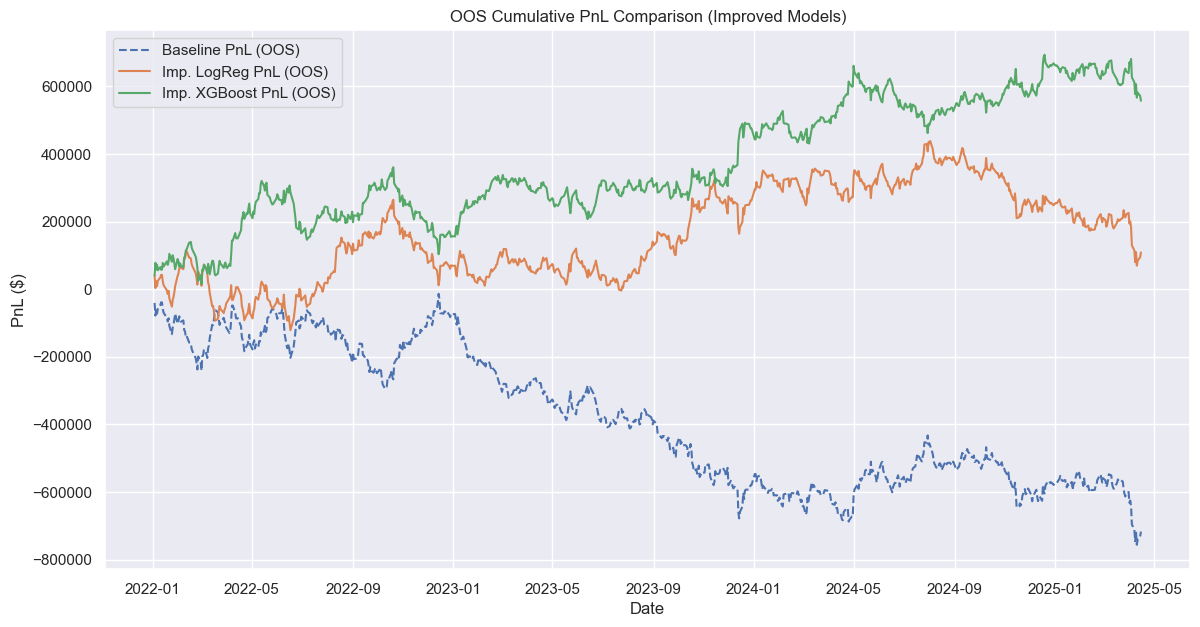


--- OOS Performance Metrics (Improved Models) ---

Baseline:
  Total PnL: $-716,923.27
  Annualized Sharpe Ratio: -0.8944
  Win Rate: 0.4645
  Max Drawdown ($): $742,023.91
  Average Daily PnL: $-870.05

Imp. LogReg:
  Total PnL: $108,532.70
  Annualized Sharpe Ratio: 0.1352
  Win Rate: 0.4976
  Max Drawdown ($): $368,734.66
  Average Daily PnL: $131.71

Imp. XGBoost:
  Total PnL: $557,316.65
  Annualized Sharpe Ratio: 0.6949
  Win Rate: 0.5183
  Max Drawdown ($): $257,157.20
  Average Daily PnL: $676.36

Imp. LogReg OOS ROC AUC: 0.5195
Imp. XGBoost OOS ROC AUC: 0.4966


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score

sns.set(style="darkgrid")
# calculate_performance_metrics function should be defined (as in cell 43 or earlier)

print("--- OOS Performance Visualization & Metrics (Improved Models) ---")
if not oos_pnl_df_imp.empty:
    plt.figure(figsize=(14, 7))
    if 'Baseline_OOS_Cumulative_PnL' in oos_pnl_df_imp: plt.plot(oos_pnl_df_imp.index, oos_pnl_df_imp['Baseline_OOS_Cumulative_PnL'], label='Baseline PnL (OOS)', linestyle='--')
    if 'LogReg_Strategy_Cumulative_PnL_Imp' in oos_pnl_df_imp: plt.plot(oos_pnl_df_imp.index, oos_pnl_df_imp['LogReg_Strategy_Cumulative_PnL_Imp'], label='Imp. LogReg PnL (OOS)')
    if 'XGB_Strategy_Cumulative_PnL_Imp' in oos_pnl_df_imp: plt.plot(oos_pnl_df_imp.index, oos_pnl_df_imp['XGB_Strategy_Cumulative_PnL_Imp'], label='Imp. XGBoost PnL (OOS)')
    plt.title('OOS Cumulative PnL Comparison (Improved Models)'); plt.xlabel('Date'); plt.ylabel('PnL ($)'); plt.legend(); plt.show()

    print("\n--- OOS Performance Metrics (Improved Models) ---")
    if 'Baseline_OOS_Cumulative_PnL' in oos_pnl_df_imp and 'Baseline_PnL' in oos_pnl_df_imp:
        metrics_base = calculate_performance_metrics(oos_pnl_df_imp['Baseline_OOS_Cumulative_PnL'], oos_pnl_df_imp['Baseline_PnL'], investment_amount)
        print("\nBaseline:"); [print(f"  {k}: ${v:,.2f}" if "PnL" in k or "Drawdown" in k else f"  {k}: {v:.4f}") for k,v in metrics_base.items()]
    if 'LogReg_Strategy_Cumulative_PnL_Imp' in oos_pnl_df_imp and 'LogReg_Strategy_Daily_PnL_Imp' in oos_pnl_df_imp:
        metrics_lr = calculate_performance_metrics(oos_pnl_df_imp['LogReg_Strategy_Cumulative_PnL_Imp'], oos_pnl_df_imp['LogReg_Strategy_Daily_PnL_Imp'], investment_amount)
        print("\nImp. LogReg:"); [print(f"  {k}: ${v:,.2f}" if "PnL" in k or "Drawdown" in k else f"  {k}: {v:.4f}") for k,v in metrics_lr.items()]
    if 'XGB_Strategy_Cumulative_PnL_Imp' in oos_pnl_df_imp and 'XGB_Strategy_Daily_PnL_Imp' in oos_pnl_df_imp:
        metrics_xgb = calculate_performance_metrics(oos_pnl_df_imp['XGB_Strategy_Cumulative_PnL_Imp'], oos_pnl_df_imp['XGB_Strategy_Daily_PnL_Imp'], investment_amount)
        print("\nImp. XGBoost:"); [print(f"  {k}: ${v:,.2f}" if "PnL" in k or "Drawdown" in k else f"  {k}: {v:.4f}") for k,v in metrics_xgb.items()]

    if not y_oos.empty and 'LogReg_Proba' in oos_signals_df_imp: print(f"\nImp. LogReg OOS ROC AUC: {roc_auc_score(y_oos, oos_signals_df_imp['LogReg_Proba']):.4f}")
    if not y_oos.empty and 'XGB_Proba' in oos_signals_df_imp: print(f"Imp. XGBoost OOS ROC AUC: {roc_auc_score(y_oos, oos_signals_df_imp['XGB_Proba']):.4f}")
else:
    print("OOS PnL data empty. Skipping visualization & metrics.")